In [1]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

PI = np.pi
e = np.e

def get_rand_number(min, max):
    range = max-min
    choice = random.uniform(0,1)
    return min+range*choice

# This is the main function we want to integrate over.
def f_of_x(x):

    return (e**(-1*x))/(1+(x-1)**2)

class Montecarlo:
    def __init__(self, number_samples, min, max):
        self.num_samples = number_samples
        self.min = min
        self.max = max

    #the approximation of integral using Monte Carlo
    def crude_monte_carlo(self):
        sum_of_samples = 0
        for i in range(self.num_samples):
            x = get_rand_number(self.min, self.max)
            sum_of_samples += f_of_x(x)
        return (self.max - self.min) * float(sum_of_samples/ self.num_samples)

    #plot the distribution of the Monte Carlo estimator
    def get_value_graph(self, N):
        plt_vals = []
        for i in range(N):
            ans = self.crude_monte_carlo()
            plt_vals.append(ans)
        plt.title("Distributions of Monte Carlo")
        plt.hist (plt_vals, bins=30, ec="black")
        plt.xlabel("Areas")
        plt.show()

    #calculate the variance of the approximation
    def get_crude_variance(self):
        running_total1 = 0
        running_total2 = 0
        for i in range(self.num_samples):
            x = get_rand_number(self.min, self.max)
            y = get_rand_number(self.min, self.max)
            running_total1 += ((self.max - self.min)*f_of_x(x))**2
            running_total2 += f_of_x(y)
        sum_of_sqs = running_total1 / self.num_samples
        sq_ave = ((self.max - self.min)*running_total2/self.num_samples)**2
        return sum_of_sqs - sq_ave



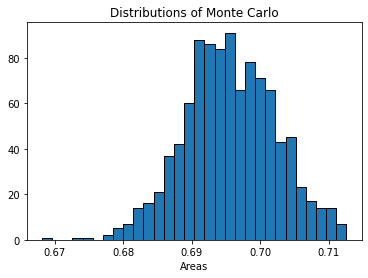

Monte Carlo Approximation of f(x): 0.6975106024795581
Variance of Approximation: 0.836663125177304
Error in Approximation: 0.0064678556151838455


In [2]:
f1 = Montecarlo(20000,0,5)
crude_estimation = f1.crude_monte_carlo()
variance = f1.get_crude_variance()
error = math.sqrt(variance/f1.num_samples)
f1.get_value_graph(1000)

print(f"Monte Carlo Approximation of f(x): {crude_estimation}")
print(f"Variance of Approximation: {variance}")
print(f"Error in Approximation: {error}")

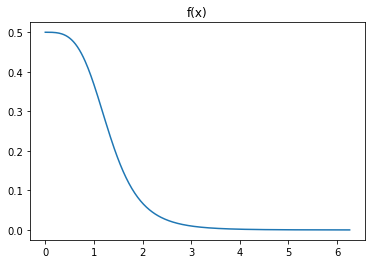

In [3]:
# plot the function
xs = [float(i/50) for i in range(int(50*PI*2))]
ys = [f_of_x(x) for x in xs]
plt.plot(xs,ys)
plt.title("f(x)");

In [4]:
# this is the template of our weight function g(x)
def g_of_x(x, A, lamda):
    return A*math.pow(e, -1*lamda*x)

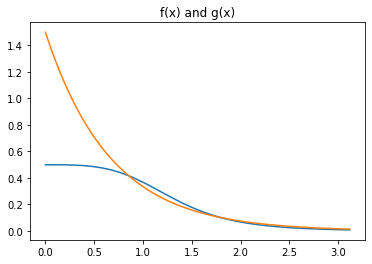

In [5]:
xs = [float(i/50) for i in range(int(50*PI))]
fs = [f_of_x(x) for x in xs]
gs = [g_of_x(x, A=1.5, lamda=1.5) for x in xs]
plt.plot(xs, fs)
plt.plot(xs, gs)
plt.title("f(x) and g(x)");

In [6]:
def inverse_G_of_r(r, lamda):
    return (-1 * math.log(float(r)))/lamda

class ImMorteCarlo(Montecarlo):

    def __init__(self,number_samples, min, max):
        Montecarlo.__init__(self,number_samples, min, max)

    #get the importance sampling variance
    def get_IS_variance(self, lamda):
        A = lamda
        running_total1 = 0
        running_total2 = 0
        for i in range(self.num_samples):
            x = get_rand_number(self.min, self.max)
            y = get_rand_number(self.min, self.max)
            running_total1 += ((f_of_x(x)/g_of_x(x, A, lamda)))**2
            running_total2 += f_of_x(y)/g_of_x(y,A,lamda)
        sum_of_sqs = running_total1 / self.num_samples
        sq_ave = (running_total2 / self.num_samples)**2
        return sum_of_sqs - sq_ave

    #test many lamdas and take the minimum variance lamda
    def best_lamdas(self):
        test_lamdas = [i*0.05 for i in range(1, 61)]
        variances = []
        for i, lamda in enumerate(test_lamdas):
            print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
            variances.append(self.get_IS_variance(lamda))
            clear_output(wait=True)
        optimal_lamda = test_lamdas[np.argmin(np.asarray(variances))]
        IS_variance = variances[np.argmin(np.asarray(variances))]
        self.optimal_lamda = optimal_lamda
        print(f"Optimal Lambda: {optimal_lamda}")
        print(f"Optimal Variance: {IS_variance}")
        print("error:",(IS_variance/10000)**0.5)
        plt.plot(test_lamdas[5:40], variances[5:40])
        plt.title("Variance of MC at Different Lambda Values");

    #approximation of importance sampling
    def importance_sampling_MC(self):
        A = self.optimal_lamda
        running_total = 0
        for i in range(self.num_samples):
            r = get_rand_number(0,1)
            running_total += f_of_x(inverse_G_of_r(r, self.optimal_lamda))/ g_of_x(inverse_G_of_r(r, self.optimal_lamda), A, self.optimal_lamda)
        approximation = float(running_total / self.num_samples)
        return approximation

    #print the Distributions of Importance sampling
    def Im_get_value_graph(self, N):
        plt_vals = []
        for i in range(N):
            ans = self.importance_sampling_MC()
            plt_vals.append(ans)
        plt.title("Distributions of Importance sampling")
        plt.hist (plt_vals, bins=30, ec="black")
        plt.xlim(0.68, 0.72)
        plt.xlabel("Areas")
        plt.show()

Optimal Lambda: 1.6500000000000001
Optimal Variance: 0.04544917003232052
error: 0.002131881095003202


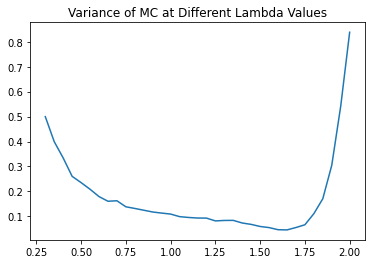

In [7]:
# get variance as a function of lambda by testing many different lambdas
im=ImMorteCarlo(20000,0,5)
im.best_lamdas()



Importance Sampling Approximation: 0.6954377966042469
Variance: 0.04409868282991081
Error: 0.001484902064614209


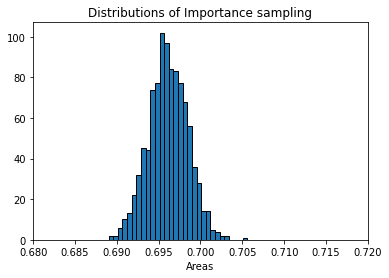

Monte Carlo Approximation of f(x): 0.69297841682135
Variance of Approximation: 0.8497509698052066
Error in Approximation: 0.006518247348042289


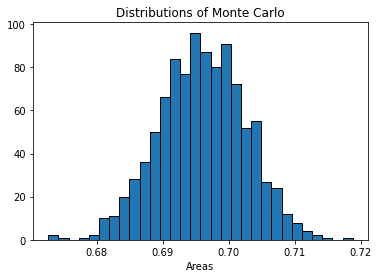

In [8]:
im_approx = im.importance_sampling_MC()
im_variance = im.get_IS_variance(im.optimal_lamda)
im_error = (im_variance / im.num_samples)**0.5
print('\n')
print(f"Importance Sampling Approximation: {im_approx}")
print(f"Variance: {im_variance}")
print(f"Error: {im_error}")
im.Im_get_value_graph(1000)

crude_estimation = im.crude_monte_carlo()
variance = im.get_crude_variance()
error = math.sqrt(variance/im.num_samples)

print(f"Monte Carlo Approximation of f(x): {crude_estimation}")
print(f"Variance of Approximation: {variance}")
print(f"Error in Approximation: {error}")
im.get_value_graph(1000)
